## Définitions


Communes associées ou déléguées : En application de la loi n° 71-588 du 16 juillet 1971 sur les regroupements de communes et de la loi n° 2010-1563 du 16 décembre 2010 de réforme des collectivités territoriales, un certain nombre de communes résultant de fusions comportent une ou plusieurs "communes associées ou déléguées". La population d’une fraction de commune est la population municipale calculée pour cette fraction de commune.

### Ensemble de communes : 
Conformément au décret n°2003-485 du 5 juin 2003, la population totale d’un ensemble de communes est la somme des populations totales des communes qui le constituent. La population municipale d’un ensemble de communes est la somme des populations municipales des communes qui le constituent.

Fractions cantonales : 
Un certain nombre de communes, en général les plus peuplées sont découpées en fractions cantonales. La population d’une fraction de commune est la population municipale calculée pour cette fraction de commune.

### Limites territoriales : 
Les populations indiquées dans les feuilles précédentes correspondent aux communes, cantons, arrondissements existant au 1ᵉʳ janvier 2019 dans les limites en vigueur à cette date.
L'INSEE attribue à chaque région, département, arrondissement, canton et commune, un code respectivement sur 2, 3, 1, 2, 3 positions. Un arrondissement, un canton ou une commune est parfaitement identifié par la concaténation du code du département dans lequel il se situe et de son propre code.

Une fraction cantonale est identifiée par le code du canton auquel elle appartient et le code de la commune.

Le rappel de ces différents codes dans tous les tableaux permet de connaître la composition cantonale et communale des arrondissements ainsi que la composition communale des cantons.

Ces codes sont publiés dans le Code officiel géographique dont la dernière édition, à jour au 1ᵉʳ janvier 2019, est disponible sur le site insee.fr. L’historique des communes depuis 1943, qui permet de connaître les modifications des limites territoriales, est également disponible sur le site.


### Nombre de communes : 
Lorsque, dans un département, le territoire d’une commune est réparti entre plusieurs cantons, celle-ci compte pour une unité dans le nombre de communes de chacun de ces cantons, mais ne compte que pour une unité dans le nombre de communes de l’arrondissement et du département. Cela explique que le nombre de communes d’un arrondissement (ou du département) ne soit pas toujours le total des nombres de communes des cantons le constituant.

### Population comptée à part : 
La population comptée à part comprend certaines personnes dont la résidence habituelle est dans une autre commune mais qui ont conservé une résidence sur le territoire de la commune :
les personnes mineures dont la résidence familiale est dans une autre commune mais qui résident, du fait de leurs études, dans la commune ;
les personnes ayant une résidence familiale sur le territoire de la commune et résidant dans une communauté d’une autre commune ; la communauté faisant partie de la liste suivante :
services de moyen ou de long séjour des établissements publics ou privés de santé, établissements sociaux de moyen ou de long séjour,maisons de retraite, foyers et résidences sociales ;
commaunautés religieuses ;
casernes ou établissements militaires ;
les personnes majeures âgées de moins de 25 ans ayant leur résidence familiale sur le territoire de la commune et qui résident dans une autre commune pour leurs études ;
les personnes sans domicile fixe rattachées à la commune au sens de la loi du 3 janvier 1969 et non recensées dans la commune.

### Population municipale : 
La population municipale comprend les personnes ayant leur résidence habituelle sur le territoire de la commune, dans un logement ou une communauté, les personnes détenues dans les établissements pénitentiaires de la commune, les personnes sans abri recensées sur le territoire de la commune et les personnes résidant habituellement dans une habitation mobile recensées sur le territoire de la commune.

### Population totale : 
La population totale est la somme de la population municipale et de la population comptée à part.

### Reading the CSV file and displaying the dataframe description

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_densite = pd.read_csv("geoflar-communes-2016.csv", ";", encoding = "ISO-8859-1")
df_densite = df_densite[["Insee Com", "Nom Com", "SUPERFICIE", "POPULATION"]]
df_densite.columns = ["DEPCOM", "COM", "SUPERFICIE", "PMUN"]
df_densite.sort_values(by = "PMUN", ignore_index = True, inplace=True)

df_densite

,DEPCOM,COM,SUPERFICIE,PMUN
0,55050,BEZONVAUX,926.0,0.0
1,55039,BEAUMONT-EN-VERDUNOIS,784.0,0.0
2,55239,HAUMONT-PRES-SAMOGNEUX,1091.0,0.0
3,55139,CUMIERES-LE-MORT-HOMME,613.0,0.0
4,55307,LOUVEMONT-COTE-DU-POIVRE,836.0,0.0
...,...,...,...,...
35926,06088,NICE,7392.0,342295.0
35927,31555,TOULOUSE,11809.0,458298.0
35928,13055,Marseille,NaN,NaN
35929,69123,Lyon,NaN,NaN


### Adding  "POURCENT" column to compute the percentage of the population ("PMUN") living in the city ("COM")

In [4]:
pop_totale = df_densite["PMUN"].sum()
df_densite["POURCENT"] = df_densite["PMUN"]/pop_totale*100
df_densite

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT
0,55050,BEZONVAUX,926.0,0.0,0.000000
1,55039,BEAUMONT-EN-VERDUNOIS,784.0,0.0,0.000000
2,55239,HAUMONT-PRES-SAMOGNEUX,1091.0,0.0,0.000000
3,55139,CUMIERES-LE-MORT-HOMME,613.0,0.0,0.000000
4,55307,LOUVEMONT-COTE-DU-POIVRE,836.0,0.0,0.000000
...,...,...,...,...,...
35926,06088,NICE,7392.0,342295.0,0.520281
35927,31555,TOULOUSE,11809.0,458298.0,0.696603
35928,13055,Marseille,NaN,NaN,NaN
35929,69123,Lyon,NaN,NaN,NaN


## Adding lines aggregating lines linked to "ARRONDISSEMENTS"

In [5]:
def summarize_df_big_city_list(df_communes, city_names, depcoms):
    """Function that summarizes a df for a city with boroughs. Returns a series summarizing the big city"""
    df = pd.DataFrame()
    for city_name,depcom in zip(city_names,depcoms):
        boolean_vector = df_communes.COM.apply(lambda x: (city_name in x) and ('ARRONDISSEMENT' in x))
        df_city = df_communes[boolean_vector].copy()
        # Summarizes the city
        s_summary = df_city.sum()
        # Set dep and name
        s_summary.DEPCOM = depcom
        s_summary.COM = city_name
        df = df.append(s_summary, ignore_index = True)
    df_communes = df_communes.append(df, ignore_index=True)
    df_communes.sort_values(by = "PMUN", ignore_index = True, inplace = True)
    return df_communes

In [6]:
df_densite = summarize_df_big_city_list(df_communes = df_densite, city_names=['MARSEILLE', 'LYON', 'PARIS'], depcoms=[13200, 69000, 75000])
df_densite.tail(10)

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT
35924,67482,STRASBOURG,7809.0,275718.0,0.419085
35925,44109,NANTES,6577.0,292718.0,0.444925
35926,06088,NICE,7392.0,342295.0,0.520281
35927,31555,TOULOUSE,11809.0,458298.0,0.696603
35928,69000,LYON,4794.0,500715.0,0.761076
35929,13200,MARSEILLE,23851.0,855393.0,1.300178
35930,75000,PARIS,10534.0,2229621.0,3.388974
35931,13055,Marseille,NaN,NaN,NaN
35932,69123,Lyon,NaN,NaN,NaN
35933,75056,Paris,NaN,NaN,NaN


### Adding  "DENSITE" column to compute the density of the population living in the city ("COM")

In [7]:
df_densite["DENSITE"] = df_densite["PMUN"] / df_densite["SUPERFICIE"] * 100
df_densite

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE
0,55050,BEZONVAUX,926.0,0.0,0.000000,0.000000
1,55039,BEAUMONT-EN-VERDUNOIS,784.0,0.0,0.000000,0.000000
2,55239,HAUMONT-PRES-SAMOGNEUX,1091.0,0.0,0.000000,0.000000
3,55139,CUMIERES-LE-MORT-HOMME,613.0,0.0,0.000000,0.000000
4,55307,LOUVEMONT-COTE-DU-POIVRE,836.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
35929,13200,MARSEILLE,23851.0,855393.0,1.300178,3586.403086
35930,75000,PARIS,10534.0,2229621.0,3.388974,21165.948358
35931,13055,Marseille,NaN,NaN,NaN,NaN
35932,69123,Lyon,NaN,NaN,NaN,NaN


### Drop the lines corresponding to "ARRONDISSEMENT"

In [35]:
df_densite[df_densite.COM.apply(lambda x: 'PARIS' in x)]

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE
13218,71343,PARIS-L'HOPITAL,276.0,291.0,0.000442,105.434783
20755,82137,PARISOT,2805.0,574.0,0.000872,20.463458
25658,81202,PARISOT,2872.0,949.0,0.001442,33.043175
30441,95241,FONTENAY-EN-PARISIS,1097.0,1921.0,0.002920,175.113947
31995,39189,DAMPARIS,888.0,2746.0,0.004174,309.234234
33518,62826,LE TOUQUET-PARIS-PLAGE,1523.0,4475.0,0.006802,293.827971
35104,38485,SEYSSINET-PARISET,1076.0,12156.0,0.018477,1129.739777
35342,75101,PARIS-1ER-ARRONDISSEMENT,182.0,17022.0,0.025873,9352.747253
35479,75102,PARIS-2E-ARRONDISSEMENT,99.0,21741.0,0.033046,21960.606061
35518,95176,CORMEILLES-EN-PARISIS,849.0,23419.0,0.035596,2758.421673


In [8]:
index_to_remove = df_densite[df_densite.COM.apply(lambda x: "ARRONDISSEMENT" in x) == True].index
index_to_remove

Int64Index([35337, 35342, 35479, 35526, 35587, 35616, 35634, 35680, 35684,
            35691, 35704, 35708, 35732, 35743, 35759, 35762, 35766, 35771,
            35773, 35782, 35806, 35810, 35811, 35822, 35824, 35825, 35827,
            35848, 35856, 35857, 35859, 35862, 35874, 35876, 35879, 35897,
            35902, 35907, 35910, 35911, 35915, 35916, 35917, 35918, 35921],
           dtype='int64')

In [9]:
df_densite.drop(index=index_to_remove, inplace=True)

#### ... And now let's remove the individual lines per borough

In [10]:
# And checking as well that the aggreagated cities are still at the end of the df (they are)
df_densite.tail(8)

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE
35926,06088,NICE,7392.0,342295.0,0.520281,4630.614177
35927,31555,TOULOUSE,11809.0,458298.0,0.696603,3880.921331
35928,69000,LYON,4794.0,500715.0,0.761076,10444.618273
35929,13200,MARSEILLE,23851.0,855393.0,1.300178,3586.403086
35930,75000,PARIS,10534.0,2229621.0,3.388974,21165.948358
35931,13055,Marseille,NaN,NaN,NaN,NaN
35932,69123,Lyon,NaN,NaN,NaN,NaN
35933,75056,Paris,NaN,NaN,NaN,NaN


#### Ensuring no lines remain

In [11]:
df_densite[df_densite.COM.apply(lambda x: 'ARRONDISSEMENT' in x)]

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE


#### Removing the lines with NaN

In [12]:
df_densite.isna()

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
35929,False,False,False,False,False,False
35930,False,False,False,False,False,False
35931,False,False,True,True,True,True
35932,False,False,True,True,True,True


In [13]:
df_densite.dropna(inplace= True)
df_densite

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE
0,55050,BEZONVAUX,926.0,0.0,0.000000,0.000000
1,55039,BEAUMONT-EN-VERDUNOIS,784.0,0.0,0.000000,0.000000
2,55239,HAUMONT-PRES-SAMOGNEUX,1091.0,0.0,0.000000,0.000000
3,55139,CUMIERES-LE-MORT-HOMME,613.0,0.0,0.000000,0.000000
4,55307,LOUVEMONT-COTE-DU-POIVRE,836.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
35926,06088,NICE,7392.0,342295.0,0.520281,4630.614177
35927,31555,TOULOUSE,11809.0,458298.0,0.696603,3880.921331
35928,69000,LYON,4794.0,500715.0,0.761076,10444.618273
35929,13200,MARSEILLE,23851.0,855393.0,1.300178,3586.403086


### Plotting percentage of population as a function of density

Text(0, 0.5, 'Percentage of population')

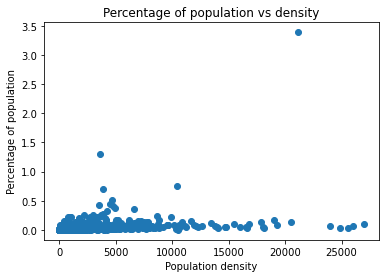

In [14]:
fig = plt.figure()
axes = plt.axes()
plt.title("Percentage of population vs density")
plt.scatter(df_densite.DENSITE,df_densite.POURCENT)
plt.xlabel("Population density")
plt.ylabel("Percentage of population")

## PROPOSITION OF PLOTTING STEPS

In [15]:
# Create bins of population density, groupby those bins, and sum to get the 
# population per bin of density
df_densite['dens_bins'] = pd.cut(df_densite['DENSITE'], 20)
df_densite.tail()

,DEPCOM,COM,SUPERFICIE,PMUN,POURCENT,DENSITE,dens_bins
35926,06088,NICE,7392.0,342295.0,0.520281,4630.614177,"(4045.289, 5393.719]"
35927,31555,TOULOUSE,11809.0,458298.0,0.696603,3880.921331,"(2696.86, 4045.289]"
35928,69000,LYON,4794.0,500715.0,0.761076,10444.618273,"(9439.008, 10787.438]"
35929,13200,MARSEILLE,23851.0,855393.0,1.300178,3586.403086,"(2696.86, 4045.289]"
35930,75000,PARIS,10534.0,2229621.0,3.388974,21165.948358,"(20226.446, 21574.876]"


In [16]:
df_ = df_densite[['PMUN', 'dens_bins']].copy()
df_.tail()

,PMUN,dens_bins
35926,342295.0,"(4045.289, 5393.719]"
35927,458298.0,"(2696.86, 4045.289]"
35928,500715.0,"(9439.008, 10787.438]"
35929,855393.0,"(2696.86, 4045.289]"
35930,2229621.0,"(20226.446, 21574.876]"


In [17]:
df_grouped = df_.groupby(by='dens_bins').sum()
df_grouped.tail()

,PMUN
dens_bins,
"(20226.446, 21574.876]",2315144.0
"(21574.876, 22923.306]",0.0
"(22923.306, 24271.736]",49656.0
"(24271.736, 25620.165]",40306.0
"(25620.165, 26968.595]",114959.0


<AxesSubplot:xlabel='dens_bins', ylabel='PMUN'>

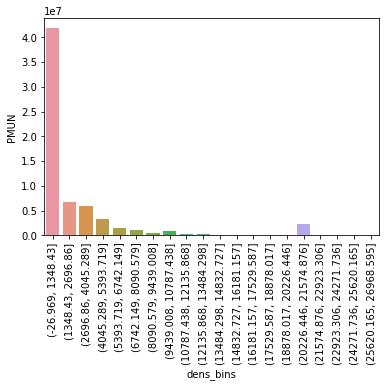

In [20]:
# Do a bar chart with the above data (one bar per bin, height of the bar being population in that bin)
plt.xticks(rotation=90)
sns.barplot(data=df_grouped, x=df_grouped.index, y='PMUN')


Important note (I noticed the same thing when doing the same with departments): Need to adjust the way the bins are distributed because there is a lot of population in the first bin alone, and then very little in the next ones.


I think the fix would be to do bins using small intervals at the beginnig of density, and intervals getting larger towards the max density (~27k). So maybe spread the bins using something like a X

In [24]:
# Quick and dirty fix to the bins
bins2 = np.append(np.arange(0, 2001, 100), [5000, 10000, 25000])
bins2

array([    0,   100,   200,   300,   400,   500,   600,   700,   800,
         900,  1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,
        1800,  1900,  2000,  5000, 10000, 25000])

The above is still a stupid distribution of bins (linear, and then 3 very large chuncks at the end)... but it goes in the right direction. I still think a X square distrib of bins would be a good try...

In [22]:
df_densite2 = df_densite.copy()

In [25]:
df_densite2['dens_bins'] = pd.cut(x=df_densite['DENSITE'], bins=bins2)
df_2 = df_densite2[['PMUN', 'dens_bins']].copy()
df_grouped2 = df_2.groupby(by='dens_bins').sum()

In [31]:
df_grouped2.tail()

,PMUN
dens_bins,
"(1800, 1900]",453223.0
"(1900, 2000]",345594.0
"(2000, 5000]",11401337.0
"(5000, 10000]",4241899.0
"(10000, 25000]",4328695.0


<AxesSubplot:xlabel='dens_bins', ylabel='PMUN'>

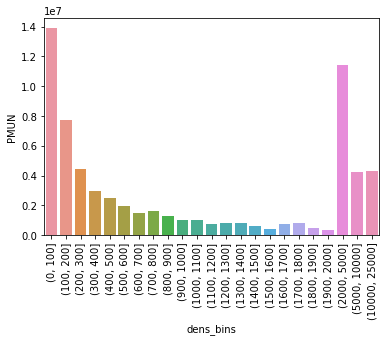

In [26]:
plt.xticks(rotation=90)
sns.barplot(data=df_grouped2, x=df_grouped2.index, y='PMUN')

In [53]:
# Do another version of the plot (smooth curve passing by top of bars)
# Using from scipy import interpolate
